<a href="https://colab.research.google.com/github/palaciosalondra584-dev/Inteligencia_Artificial/blob/main/RNN/Prediccion_de_la_Inflacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref: https://www.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?accion=consultarCuadro&idCuadro=CP151&sector=8&locale=es


##Importamos pandas y cargamos el archivo copiando la ruta de acceso mostrando las primeras 20 filas

In [ ]:
import pandas as pd

df = pd.read_excel('/content/Consulta_20241113-093525023.xlsx')
df.head(20)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Banco de México,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Índices de Precios al Consumidor y UDIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Inflación,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fecha de consulta: 13/11/2024 09:35:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Aviso importante: Algunas de las series que es...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Título,"Índice Nacional de Precios al consumidor, Vari...","Índice Nacional de Precios al consumidor, Vari...","Índice Nacional de Precios al consumidor, vari...","Inflación, Subyacente (nueva definición), Mensual","Inflación, Subyacente (nueva definición), Acum...","Inflación, Subyacente (nueva definición), Anual","Inflación, No subyacente (nueva definición), M...","Inflación, No subyacente (nueva definición), A...","Inflación, No subyacente (nueva definición), A..."
9,Periodo disponible,Ene 1969 - Oct 2024,Ene 1970 - Oct 2024,Ene 1970 - Oct 2024,Feb 1982 - Oct 2024,Ene 1983 - Oct 2024,Ene 1983 - Oct 2024,Feb 1982 - Oct 2024,Ene 1983 - Oct 2024,Ene 1983 - Oct 2024


##Seleccionamos la fila 8 del DataFrame alamcenandolo en la columna "new_header" para renombrar las columnas

In [ ]:
# Seleccionar la fila 8 como encabezado (índice 7)
new_header = df.iloc[8]
new_header

,8
Banco de México,Título
Unnamed: 1,"Índice Nacional de Precios al consumidor, Vari..."
Unnamed: 2,"Índice Nacional de Precios al consumidor, Vari..."
Unnamed: 3,"Índice Nacional de Precios al consumidor, vari..."
Unnamed: 4,"Inflación, Subyacente (nueva definición), Mensual"
Unnamed: 5,"Inflación, Subyacente (nueva definición), Acum..."
Unnamed: 6,"Inflación, Subyacente (nueva definición), Anual"
Unnamed: 7,"Inflación, No subyacente (nueva definición), M..."
Unnamed: 8,"Inflación, No subyacente (nueva definición), A..."
Unnamed: 9,"Inflación, No subyacente (nueva definición), A..."


##Creamos un nuevo DataFrame tomando la fila desde la 18 en adelante para eliminar datos irrelevantes

In [ ]:
# Crear un nuevo DataFrame desde la fila 17 en adelante
df = df[17:]
df

,Banco de México,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
17,1969-01-01 00:00:00,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
18,1969-02-01 00:00:00,0.36,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
19,1969-03-01 00:00:00,0.1,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
20,1969-04-01 00:00:00,0.27,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
21,1969-05-01 00:00:00,0,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
...,...,...,...,...,...,...,...,...,...,...
682,2024-06-01 00:00:00,0.38,1.68,4.98,0.22,1.95,4.13,0.87,0.85,7.67
683,2024-07-01 00:00:00,1.05,2.74,5.57,0.32,2.27,4.05,3.29,4.16,10.36
684,2024-08-01 00:00:00,0.01,2.75,4.99,0.22,2.5,4,-0.7,3.43,8.03
685,2024-09-01 00:00:00,0.05,2.8,4.58,0.28,2.79,3.91,-0.72,2.69,6.5


##Asignamos valores de new_header como los nombres de las columnasnmostrando las primeras 5 filas

In [ ]:
# Asignar el nuevo encabezado
df.columns = new_header
df.head()

8,Título,"Índice Nacional de Precios al consumidor, Variación mensual","Índice Nacional de Precios al consumidor, Variación acumulada","Índice Nacional de Precios al consumidor, variación anual","Inflación, Subyacente (nueva definición), Mensual","Inflación, Subyacente (nueva definición), Acumulada en el año","Inflación, Subyacente (nueva definición), Anual","Inflación, No subyacente (nueva definición), Mensual","Inflación, No subyacente (nueva definición), Acumulada en el año","Inflación, No subyacente (nueva definición), Anual"
17,1969-01-01 00:00:00,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
18,1969-02-01 00:00:00,0.36,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
19,1969-03-01 00:00:00,0.1,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
20,1969-04-01 00:00:00,0.27,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
21,1969-05-01 00:00:00,0,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E


##Reiniciamos el indice del DataFrame para que comience desde cero descartando el indice anterior e imprimiendo las primeras 5 filas

In [ ]:
# Reiniciar el índice para que comience desde 0 en el nuevo DataFrame
df.reset_index(drop=True, inplace=True)
df.head()

8,Título,"Índice Nacional de Precios al consumidor, Variación mensual","Índice Nacional de Precios al consumidor, Variación acumulada","Índice Nacional de Precios al consumidor, variación anual","Inflación, Subyacente (nueva definición), Mensual","Inflación, Subyacente (nueva definición), Acumulada en el año","Inflación, Subyacente (nueva definición), Anual","Inflación, No subyacente (nueva definición), Mensual","Inflación, No subyacente (nueva definición), Acumulada en el año","Inflación, No subyacente (nueva definición), Anual"
0,1969-01-01 00:00:00,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
1,1969-02-01 00:00:00,0.36,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
2,1969-03-01 00:00:00,0.1,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
3,1969-04-01 00:00:00,0.27,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
4,1969-05-01 00:00:00,0,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E


##Convertimos la columna "Titulo" a tipo datetime y la guardamos en una nueva columna llamada "Fecha" e imprimimos las primeras 5 filas para ver si se hizo lo que queriamos

In [ ]:
# Convertir la columna 'fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Título'])
df.head()

8,Título,"Índice Nacional de Precios al consumidor, Variación mensual","Índice Nacional de Precios al consumidor, Variación acumulada","Índice Nacional de Precios al consumidor, variación anual","Inflación, Subyacente (nueva definición), Mensual","Inflación, Subyacente (nueva definición), Acumulada en el año","Inflación, Subyacente (nueva definición), Anual","Inflación, No subyacente (nueva definición), Mensual","Inflación, No subyacente (nueva definición), Acumulada en el año","Inflación, No subyacente (nueva definición), Anual",Fecha
0,1969-01-01 00:00:00,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,1969-01-01
1,1969-02-01 00:00:00,0.36,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,1969-02-01
2,1969-03-01 00:00:00,0.1,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,1969-03-01
3,1969-04-01 00:00:00,0.27,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,1969-04-01
4,1969-05-01 00:00:00,0,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,1969-05-01


##Mostramos el resumen del DataFrame para ver la estructura y detectar que nos falta

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 11 columns):
 #   Column                                                            Non-Null Count  Dtype         
---  ------                                                            --------------  -----         
 0   Título                                                            670 non-null    object        
 1   Índice Nacional de Precios al consumidor, Variación mensual       670 non-null    object        
 2   Índice Nacional de Precios al consumidor, Variación acumulada     670 non-null    object        
 3   Índice Nacional de Precios al consumidor, variación anual         670 non-null    object        
 4   Inflación, Subyacente (nueva definición), Mensual                 670 non-null    object        
 5   Inflación, Subyacente (nueva definición), Acumulada en el año     670 non-null    object        
 6   Inflación, Subyacente (nueva definición), Anual                   670 non-

##Filtramos el DataFrame para quedarnos con la fila "Fecha" del el 1 de enero de 2014 y el 31 de diciembre de 2024 e imprimimos las primeras 5 filas

In [ ]:
# Filtrar por el año 2023
_df = df[(df['Fecha'] >= '01-01-2014') & (df['Fecha'] <= '12-31-2024')]
_df.head()

8,Título,"Índice Nacional de Precios al consumidor, Variación mensual","Índice Nacional de Precios al consumidor, Variación acumulada","Índice Nacional de Precios al consumidor, variación anual","Inflación, Subyacente (nueva definición), Mensual","Inflación, Subyacente (nueva definición), Acumulada en el año","Inflación, Subyacente (nueva definición), Anual","Inflación, No subyacente (nueva definición), Mensual","Inflación, No subyacente (nueva definición), Acumulada en el año","Inflación, No subyacente (nueva definición), Anual",Fecha
540,2014-01-01 00:00:00,0.89,0.89,4.48,0.85,0.85,3.21,1.02,1.02,8.58,2014-01-01
541,2014-02-01 00:00:00,0.25,1.15,4.23,0.28,1.14,2.98,0.17,1.19,8.28,2014-02-01
542,2014-03-01 00:00:00,0.27,1.43,3.76,0.21,1.35,2.89,0.46,1.65,6.54,2014-03-01
543,2014-04-01 00:00:00,-0.19,1.24,3.5,0.29,1.65,3.11,-1.67,-0.05,4.75,2014-04-01
544,2014-05-01 00:00:00,-0.32,0.91,3.51,0.09,1.74,3,-1.64,-1.69,5.19,2014-05-01


##Mostramos las primeras 5 filas para ver si se hizo el filtrado

In [ ]:
_df.tail()

8,Título,"Índice Nacional de Precios al consumidor, Variación mensual","Índice Nacional de Precios al consumidor, Variación acumulada","Índice Nacional de Precios al consumidor, variación anual","Inflación, Subyacente (nueva definición), Mensual","Inflación, Subyacente (nueva definición), Acumulada en el año","Inflación, Subyacente (nueva definición), Anual","Inflación, No subyacente (nueva definición), Mensual","Inflación, No subyacente (nueva definición), Acumulada en el año","Inflación, No subyacente (nueva definición), Anual",Fecha
665,2024-06-01 00:00:00,0.38,1.68,4.98,0.22,1.95,4.13,0.87,0.85,7.67,2024-06-01
666,2024-07-01 00:00:00,1.05,2.74,5.57,0.32,2.27,4.05,3.29,4.16,10.36,2024-07-01
667,2024-08-01 00:00:00,0.01,2.75,4.99,0.22,2.5,4,-0.7,3.43,8.03,2024-08-01
668,2024-09-01 00:00:00,0.05,2.8,4.58,0.28,2.79,3.91,-0.72,2.69,6.5,2024-09-01
669,2024-10-01 00:00:00,0.55,3.37,4.76,0.28,3.08,3.8,1.46,4.18,7.68,2024-10-01


##Creamos una grafica colocando  las etiquetas para mostrar como vario el indice a lo largo de los años

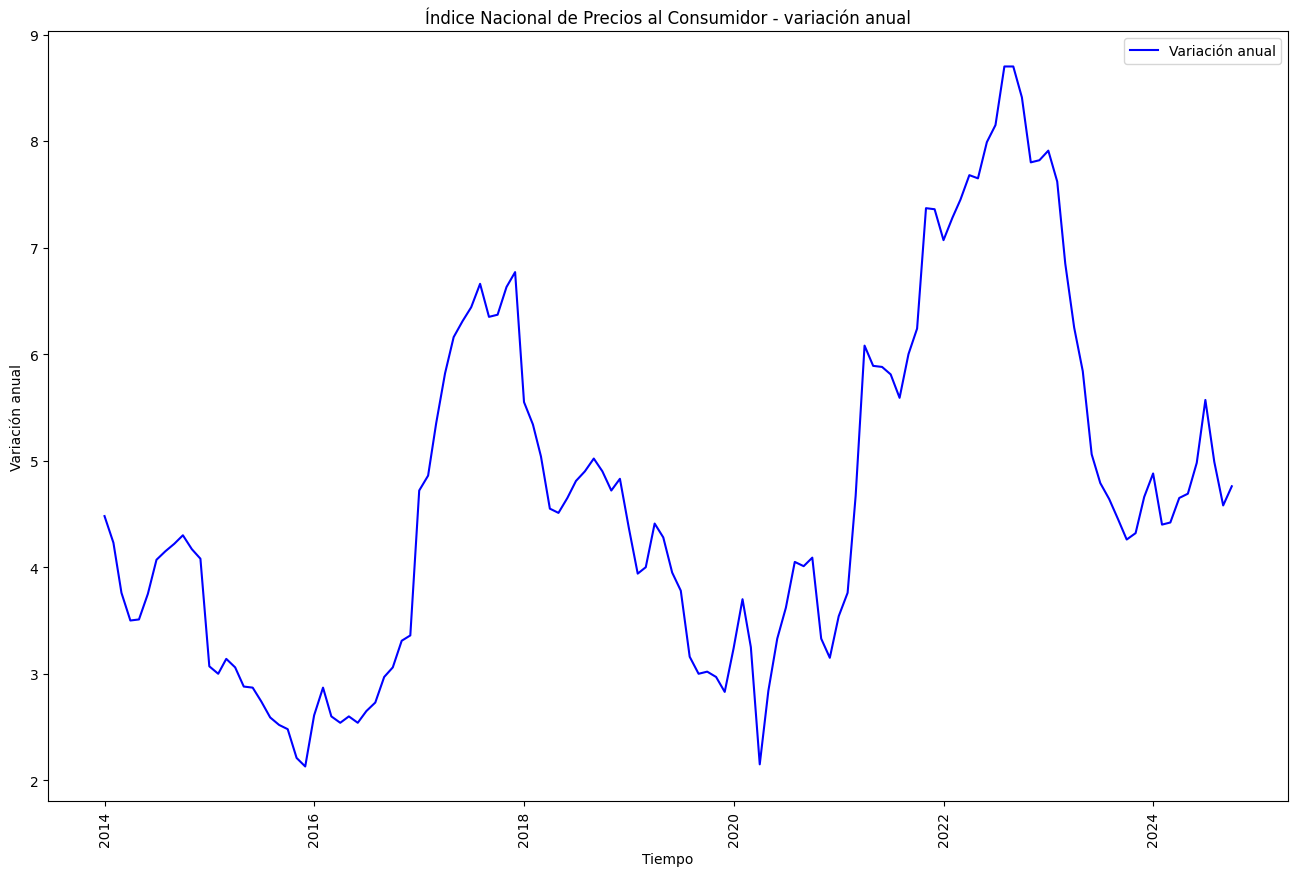

In [ ]:
import matplotlib.pyplot as plt

# dates = pd.to_datetime(_df["Fecha"]).apply(lambda x: x.strftime('%Y-%m-%d')).tolist()
dates = _df["Fecha"].tolist()

# Grafica el "Índice Nacional de Precios al consumidor, variación anual"
plt.figure(figsize=(16, 10))
plt.plot(dates,_df["Índice Nacional de Precios al consumidor, variación anual"], color='blue', label="Variación anual")
plt.title("Índice Nacional de Precios al Consumidor - variación anual")
plt.xlabel("Tiempo")
plt.ylabel("Variación anual")
plt.xticks(rotation=90)
plt.legend()
plt.show()


##Separamos los valores de entrada y variable de objeto

In [ ]:
X = _df.drop(columns=["Índice Nacional de Precios al consumidor, variación anual", "Título", "Fecha"])
y = _df["Índice Nacional de Precios al consumidor, variación anual"].values


##Mostramos cuantas filas y columnas contiene el DataFrame

In [ ]:
X.shape

(130, 8)

##Normalizamos los datos para que los valores queden entre 0 y 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

##Construimos secuencias yemporales, ponemos 12 secuencias alo largo del tiempo, recorriendo los valores anteriores y colocandolos en una nueva etiqueta, convirtiendo las listas en arreglos NumPy para el modelo

In [ ]:
import numpy as np

window_size = 12
X_rnn = []
y_rnn = []
# Construye secuencias temporales
for i in range(window_size, len(X_scaled)):
    X_rnn.append(X_scaled[i - window_size:i])
    y_rnn.append(y_scaled[i])

X_rnn, y_rnn = np.array(X_rnn), np.array(y_rnn)

##Dividimos los datos para entrenamiento y prueba

In [ ]:
split = int(len(X) * 0.8)
X_train, y_train = X_rnn[:split], y_rnn[:split]
X_test, y_test = X_rnn[split:], y_rnn[split:]

##Mostramos las dimensiones del modelo mostrando el numero de secuencias de entrenamiento y la longuitud de cada secuencia de x

In [ ]:
X_train.shape

(104, 12, 8)

##Mostramos las dimensiones del arreglo mostrando el numero de secuencias para y

In [ ]:
y_test.shape

(14, 1)

##Indicamos que cada 12 se hace una secucncia temporal en 12 pasos de tiempo consecutivo

In [ ]:
window_size

12

##Mostramos el numero de caracteristicas por paso del tiempo para decir cuantas columnas tiene cada registro dentro de la ventana temporal

In [ ]:
X_train.shape[2]

8

##Construimos la red neuronal: la primera capa con 60 neuronas, la segunda con 30, la tercera con 15 y solo una salida

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, GRU

model = Sequential([
  SimpleRNN(units=60, return_sequences=True, input_shape=(window_size, X_train.shape[2])),
  SimpleRNN(units=30, return_sequences=True),
  SimpleRNN(units=15, return_sequences=False),
  Dense(units=1)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##Optimizamos el modelo con Adam con una tasa de aprendizaje de 0.001

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compilar el modelo
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

##Entrenamos el modelo durante 10 epocas con tamaño de 1 batch y validando los datos usando los datos de prueba

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train, batch_size=1, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.2119 - val_loss: 0.0080
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0139 - val_loss: 0.0053
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - val_loss: 0.0045
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087 - val_loss: 0.0026
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0122 - val_loss: 0.0040
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0080 - val_loss: 0.0039
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0085 - val_loss: 0.0044
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0052 - val_loss: 0.0037
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0064 - val_loss: 0.0043
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0058 - val_loss: 0.0036


##Realizamos las predicciones, descalonamos los valores reales para devolver los valores originales imprimiendo los primeros 5 valores para comparar el desempeño del modelo

In [ ]:
# Predice en el conjunto de prueba y desescala los datos
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test)

# Muestra algunas predicciones y valores reales
print("Predicciones:", predictions.flatten()[:5])
print("Valores reales:", y_test_original.flatten()[:5])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
Predicciones: [4.558923  4.1212096 3.9238067 4.012292  4.5824122]
Valores reales: [4.45 4.26 4.32 4.66 4.88]


##Evaluamos el desempeño del modelo calculando el error absoluto medio, error cuadratico, raiz del error cuadratico medio y el coeficiente de determinacion imprimiendo la precision de las predicciones

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calcula el MAE
mae = mean_absolute_error(y_test, predictions)
print(f"Error Absoluto Medio (MAE): {mae}")

# Calcula el MSE
mse = mean_squared_error(y_test, predictions)
print(f"Error Cuadrático Medio (MSE): {mse}")

# Calcula el RMSE
rmse = np.sqrt(mse)
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")

# Calcula el Coeficiente de Determinación (R²)
r2 = r2_score(y_test, predictions)
print(f"Coeficiente de Determinación (R²): {r2}")


Error Absoluto Medio (MAE): 4.177154180666084
Error Cuadrático Medio (MSE): 17.624951289357462
Raíz del Error Cuadrático Medio (RMSE): 4.198208104579555
Coeficiente de Determinación (R²): -6913.73184828571


##Creamos una garfica para comparar los valores reales de la inflacion real y predicha a lo largo del tiempo mostrando el desempeño del modelo en el conjunto de prueba

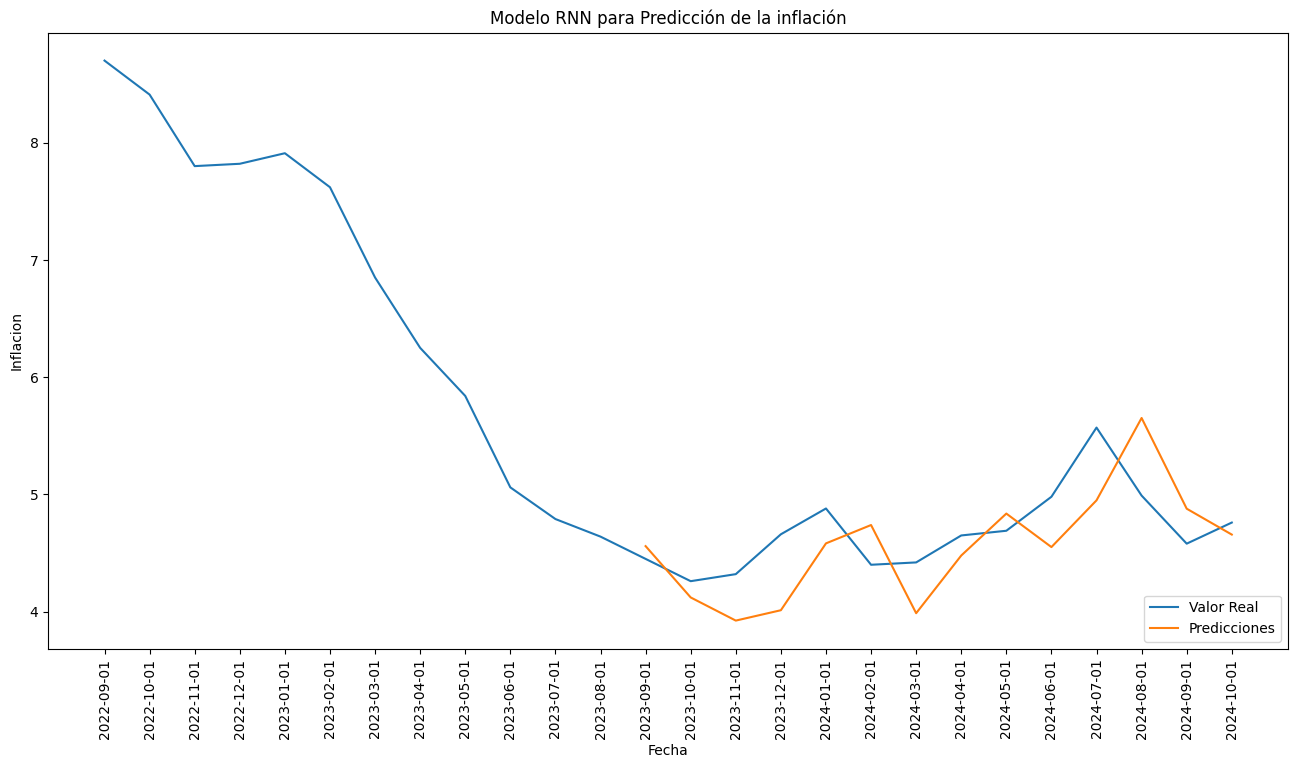

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Gráfica de los valores reales y las predicciones del conjunto de prueba
valid = _df[split:]
valid = valid.reset_index(drop=True)
valid['Predictions'] = np.nan
valid.loc[window_size:, 'Predictions'] = predictions

dates_valid = pd.to_datetime(valid['Fecha']).apply(lambda x: x.strftime('%Y-%m-%d')).tolist()

plt.figure(figsize=(16, 8))
plt.title('Modelo RNN para Predicción de la inflación')
plt.xlabel('Fecha')
plt.ylabel('Inflacion')
plt.plot(dates_valid, valid[["Índice Nacional de Precios al consumidor, variación anual", 'Predictions']])
plt.legend(['Valor Real', 'Predicciones'], loc='lower right')
plt.xticks(rotation=90)
plt.show()